In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import squarify

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, f1_score, classification_report
from sklearn.model_selection import RandomizedSearchCV
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
import plotly.graph_objects as go

import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

sns.set_style('darkgrid')

In [62]:
data = pd.read_excel('churn_prediction.xlsx')

# 1. Question 1
* What are the patterns/behavior of churned users? 
* What are your suggestions to the company to reduce churned users.

## 1.1 Exploratory Data Analysis

### 1.1.1 Overview

In [63]:
data.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,52869,0,20.0,Mobile Phone,3,7.0,E wallet,Female,4.0,4,Fashion,5,Married,3,0,26.0,5.0,16.0,NaN,229.53
1,52942,0,13.0,Computer,1,9.0,Cash on Delivery,Female,4.0,4,Fashion,3,Single,2,0,26.0,11.0,NaN,9.0,234.38
2,52972,0,16.0,Mobile Phone,3,7.0,Debit Card,Male,3.0,4,Laptop & Accessory,3,Divorced,3,0,26.0,5.0,12.0,7.0,174.07
3,53125,0,5.0,Mobile Phone,1,16.0,Debit Card,Male,3.0,4,Fashion,4,Married,3,0,26.0,2.0,2.0,9.0,231.48
4,53367,0,9.0,Mobile Phone,1,28.0,Debit Card,Female,3.0,4,Laptop & Accessory,2,Divorced,3,1,26.0,1.0,2.0,8.0,165.14


In [64]:
data.shape

(5630, 20)

In [65]:
data.columns

Index(['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

### 1.1.2 Quick Statistical Overview

In [67]:
data.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


In [68]:
data.describe(include='object')

,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus
count,5630,5630,5630,5630,5630
unique,3,7,2,6,3
top,Mobile Phone,Debit Card,Male,Laptop & Accessory,Married
freq,2765,2314,3384,2050,2986


### 1.1.3 Figuring out null values

In [69]:
data.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

### 1.1.4 Figuring out duplicated values

In [70]:
data.duplicated().sum()

0

### 1.1.5 Conclusion

* Data have 5630 rows and 20 columns
* All columns have right data type except columns ['CustomerID', 'Churn', 'CityTier'] have numeric data type but have no mathematical meaning -> remain unchange to encoding step
* 7 columns have null values
* No duplicated values

## 1.2 Data Cleaning

### 1.2.1 Drop CustomerID column

In [71]:
data.drop('CustomerID', axis=1, inplace=True)

### 1.2.2 Handle Missing values

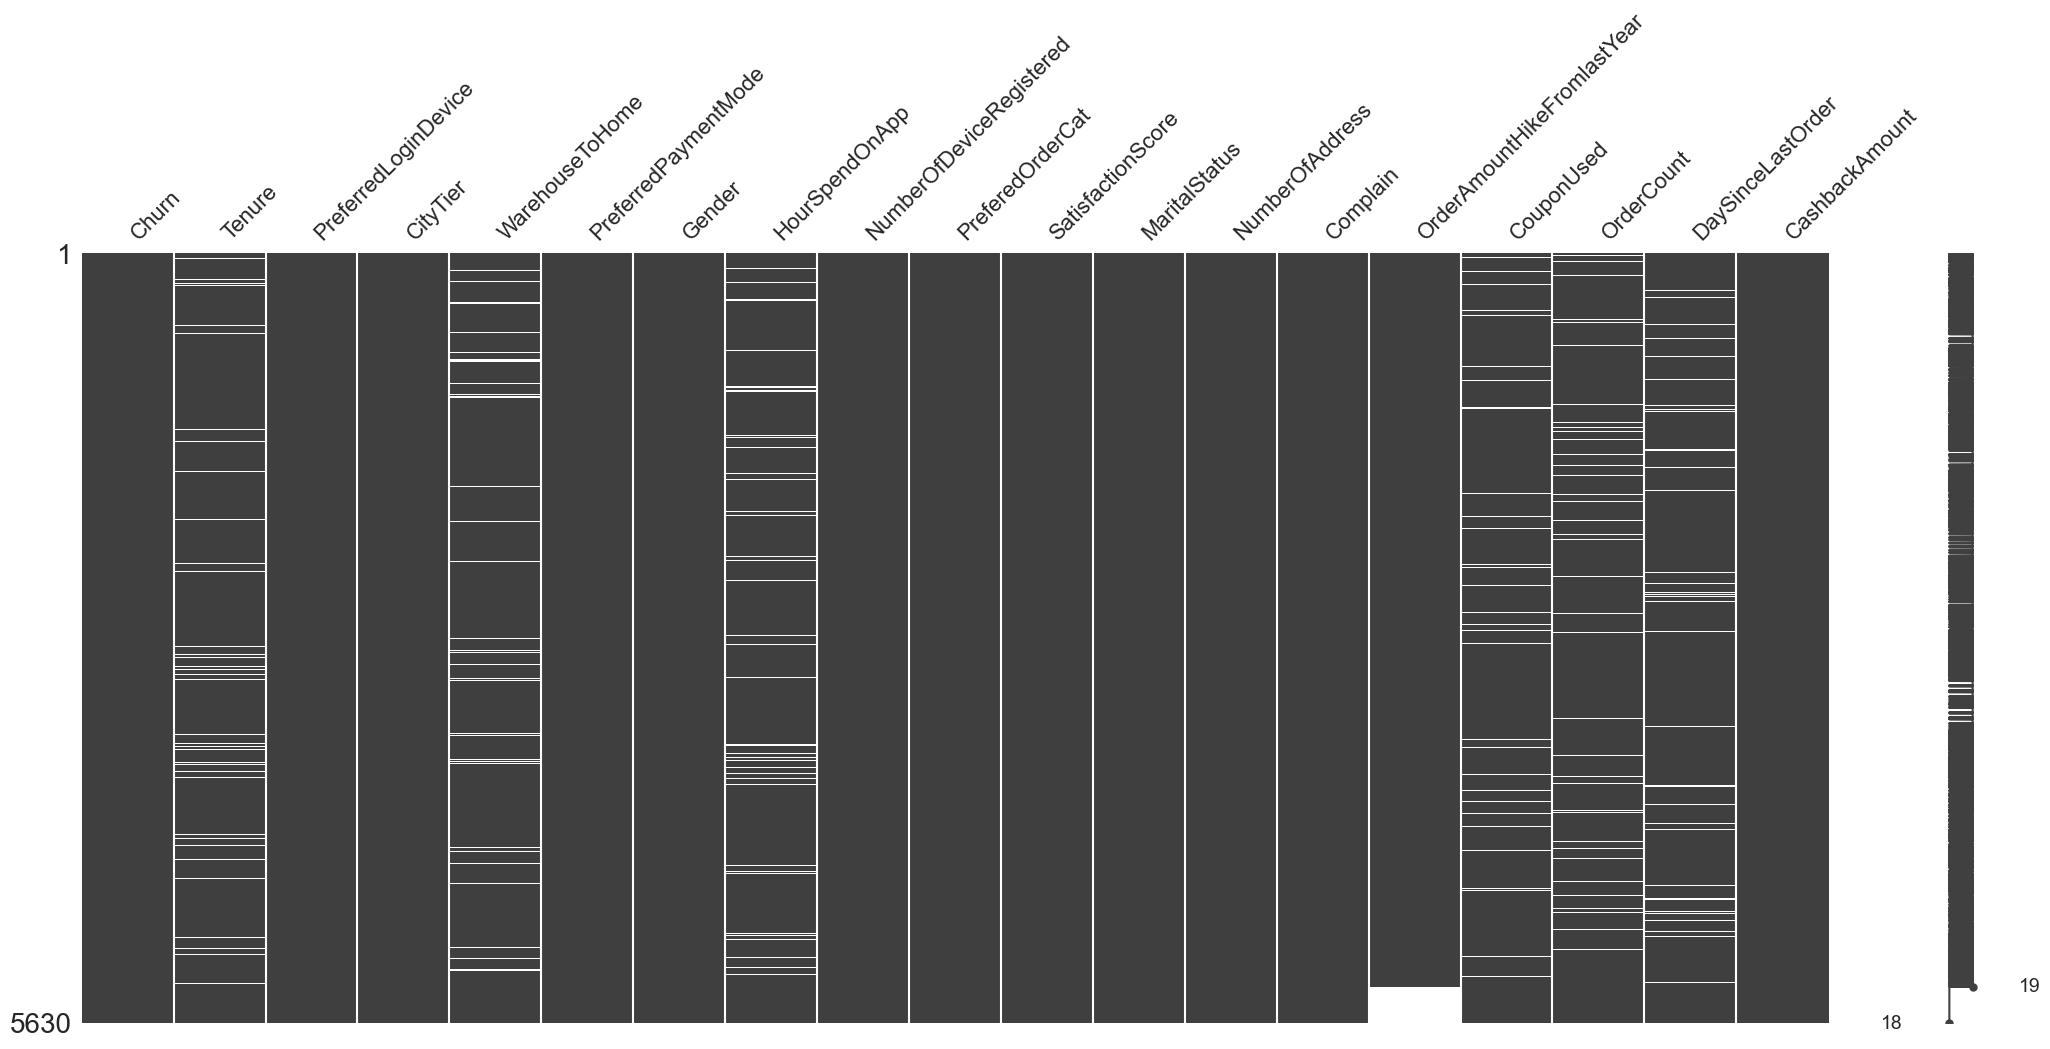

In [72]:
# Ignore error due to miss match (b -> visible keyword) between missingno and matplotlib package
try: 
    # Display missing data using missingno package
    msno.matrix(data)
    plt.show()
except:
    pass

* Initial observation: Data missing completely at random
-> Sort the data to uncover some relationship between missingness type

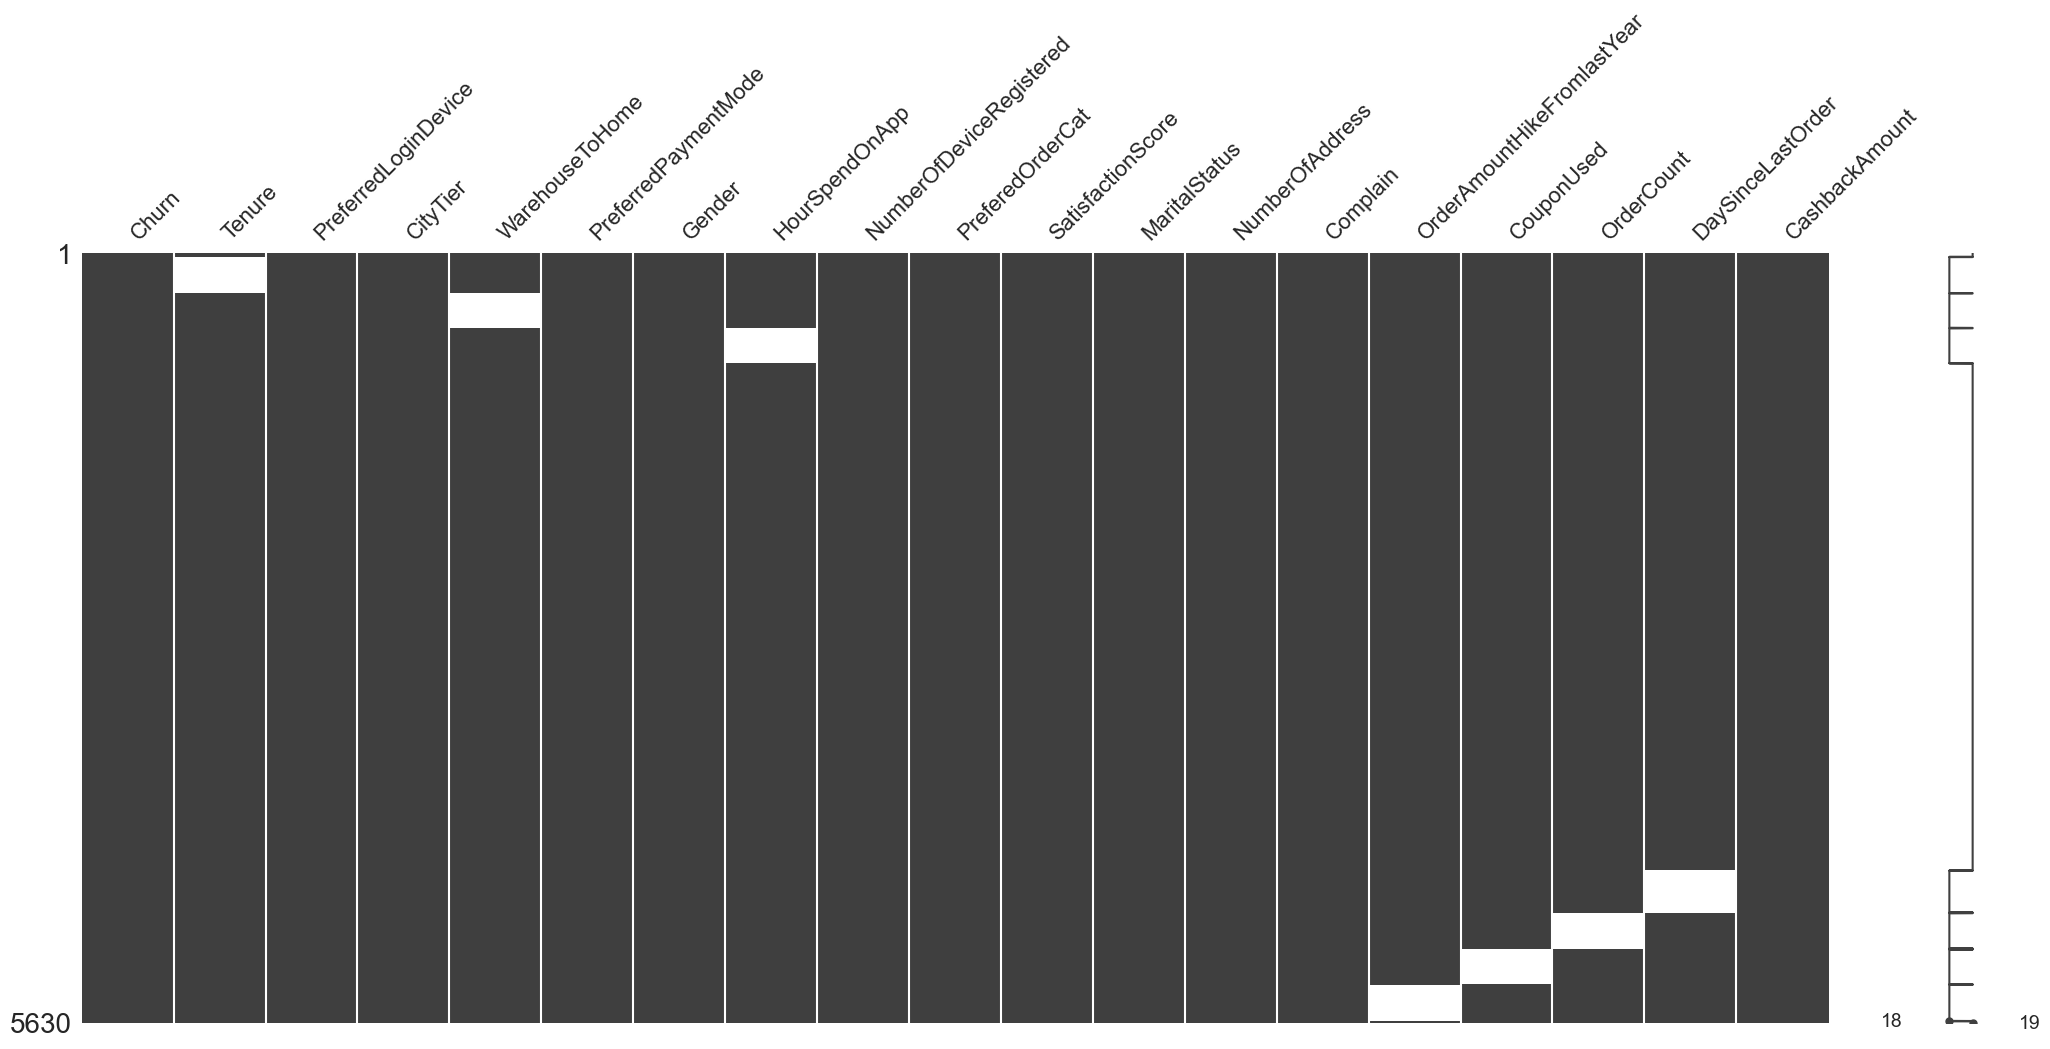

In [73]:
# Sort by all column and found out 
# sorting by the CashbackAmount columns creates a pattern
try: 
    msno.matrix(data.sort_values(by='CashbackAmount'))
    plt.show()
except:
    pass

* Data missing at random (MAR)

In [74]:
# Number of missing values in the dataset
print(f'# missing values: {data.isnull().sum().sum()}')
# Number of rows with missing values
print(f'# rows with missing values: {data[data.isnull().any(axis=1)].shape[0]}')

# missing values: 1856
# rows with missing values: 1856


In [75]:
missing_rate = data.isnull().sum().sum()*100/ data.shape[0]
missing_rate

32.96625222024867

In [76]:
missing_cols = data.columns[data.isnull().any()].tolist()
missing_cols

['Tenure',
 'WarehouseToHome',
 'HourSpendOnApp',
 'OrderAmountHikeFromlastYear',
 'CouponUsed',
 'OrderCount',
 'DaySinceLastOrder']

* Each row has maximum 1 missing value, missing values are numerical type
* Because data's missing type is MAR, drop missing row (~33%) will lead to loss data \
&rarr; Impute these features with means, medians and mode wherever appropriate.

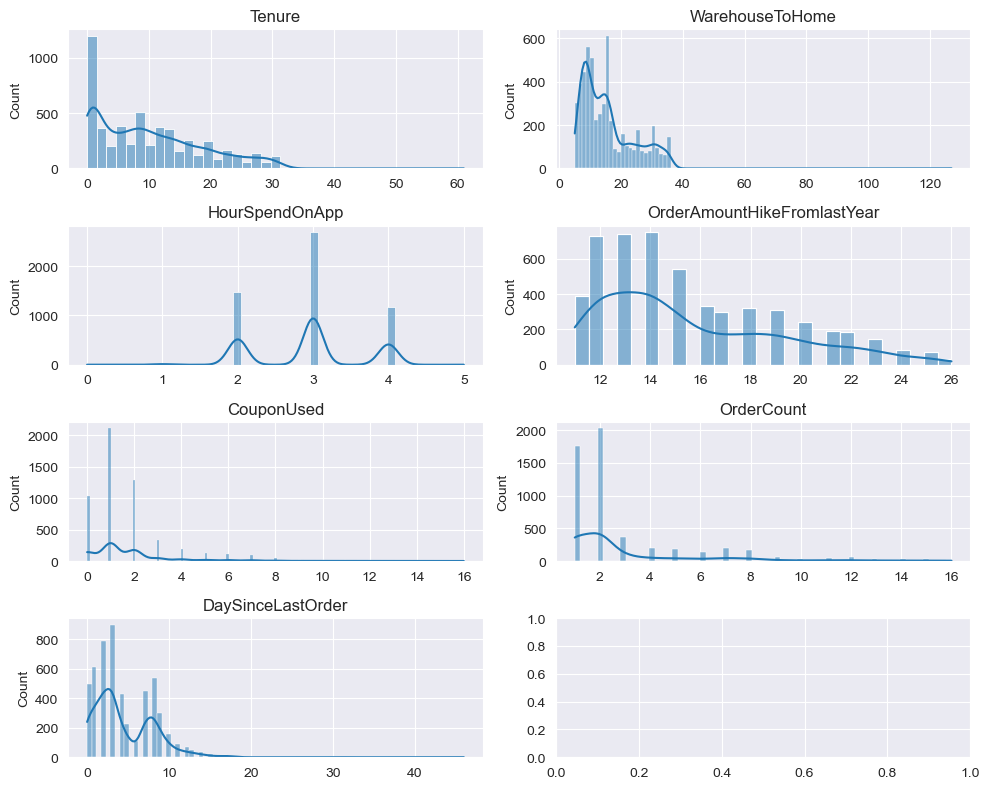

In [77]:
f, axs = plt.subplots(4, 2, figsize=(10, 8))
for ax, col in zip(axs.flatten(), missing_cols):
    sns.histplot(x=data[col], kde=True, ax=ax)
    ax.set(xlabel='', title=col)
f.tight_layout()

* Mean imputation can be used when the distribution of the data is normal, no extreme values (outliers), and the missing values are random. 
* Median imputation is appropriate when the distribution of the data is skewed, has extreme values
* Mode imputation using when data is categorical or discrete

Therefore:
* Tenure - Median 
* WarehouseTOHome - Median
* OrderAmountHikeFromlastYear - Median
* CouponUsed - Median
* OrderCount - Median
* DaySinceLastOrder - Median
* HourSpendOnApp - Mode 

In [78]:
# Impute with Median
data['Tenure'].fillna(data.Tenure.median(), inplace=True)
data['WarehouseToHome'].fillna(data.WarehouseToHome.median(), inplace=True)
data['CouponUsed'].fillna(data.CouponUsed.median(), inplace=True)
data['OrderCount'].fillna(data.OrderCount.median(), inplace=True)
data['DaySinceLastOrder'].fillna(data.DaySinceLastOrder.median(), inplace=True)
data['OrderAmountHikeFromlastYear'].fillna(round(data.OrderAmountHikeFromlastYear.median()), inplace=True)

# Impute with Mode - 3
data['HourSpendOnApp'].fillna(3, inplace=True)

In [79]:
data.isnull().sum().sum()

0

### 1.2.3 Univariate Analyse

#### Numerical value

In [80]:
numeric_cols = data.loc[:, data.dtypes != np.object_].columns.tolist()
# Exclude column having category meaning
numeric_cols = [col for col in numeric_cols if col not in ['CityTier', 'Churn']]
print(numeric_cols)

['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']


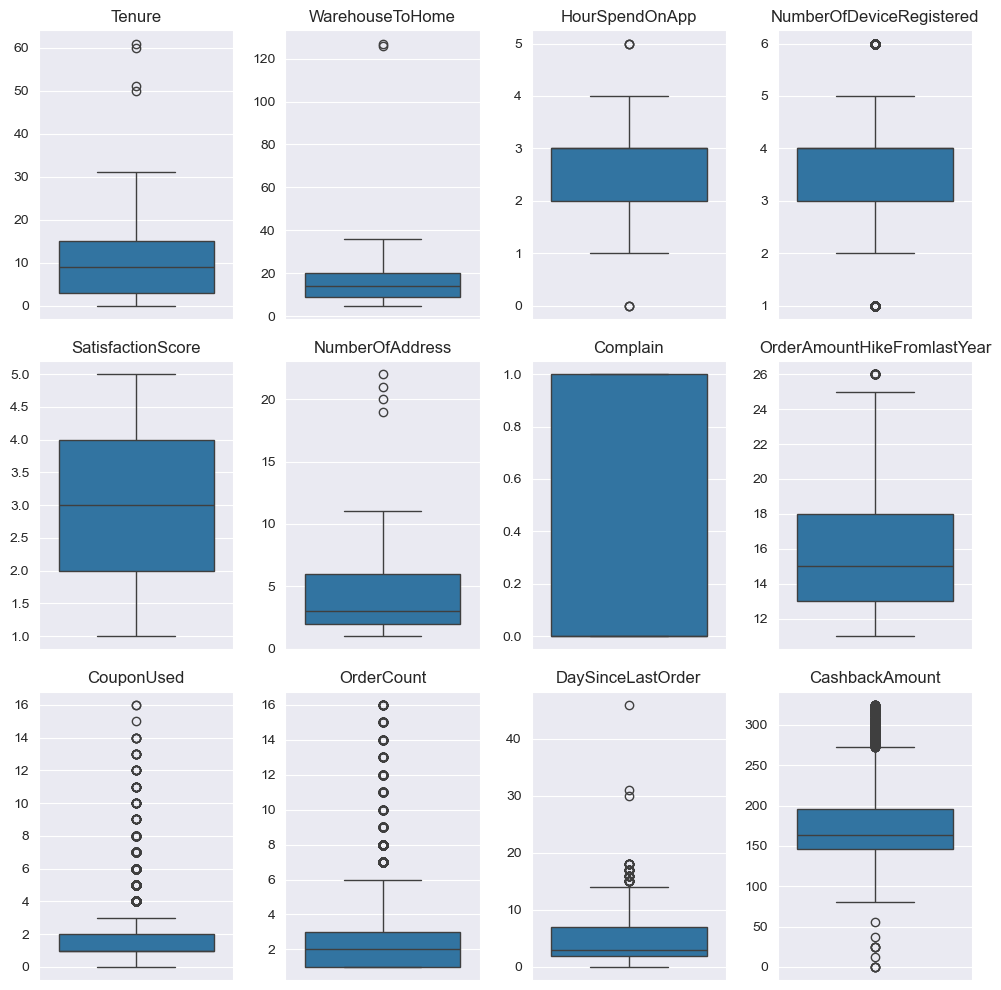

In [81]:
f, axs = plt.subplots(3, 4, figsize=(10, 10))
for ax, col in zip(axs.flatten(), numeric_cols):
    sns.boxplot(y=data[col], ax=ax)
    ax.set(ylabel='', title=col)
f.tight_layout()

#### Categorical value

In [82]:
cate_cols = data.loc[:, data.dtypes == np.object_].columns.tolist()
# Include CityTier and Churn column
cate_cols += ['CityTier', 'Churn']
print(cate_cols)

['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus', 'CityTier', 'Churn']


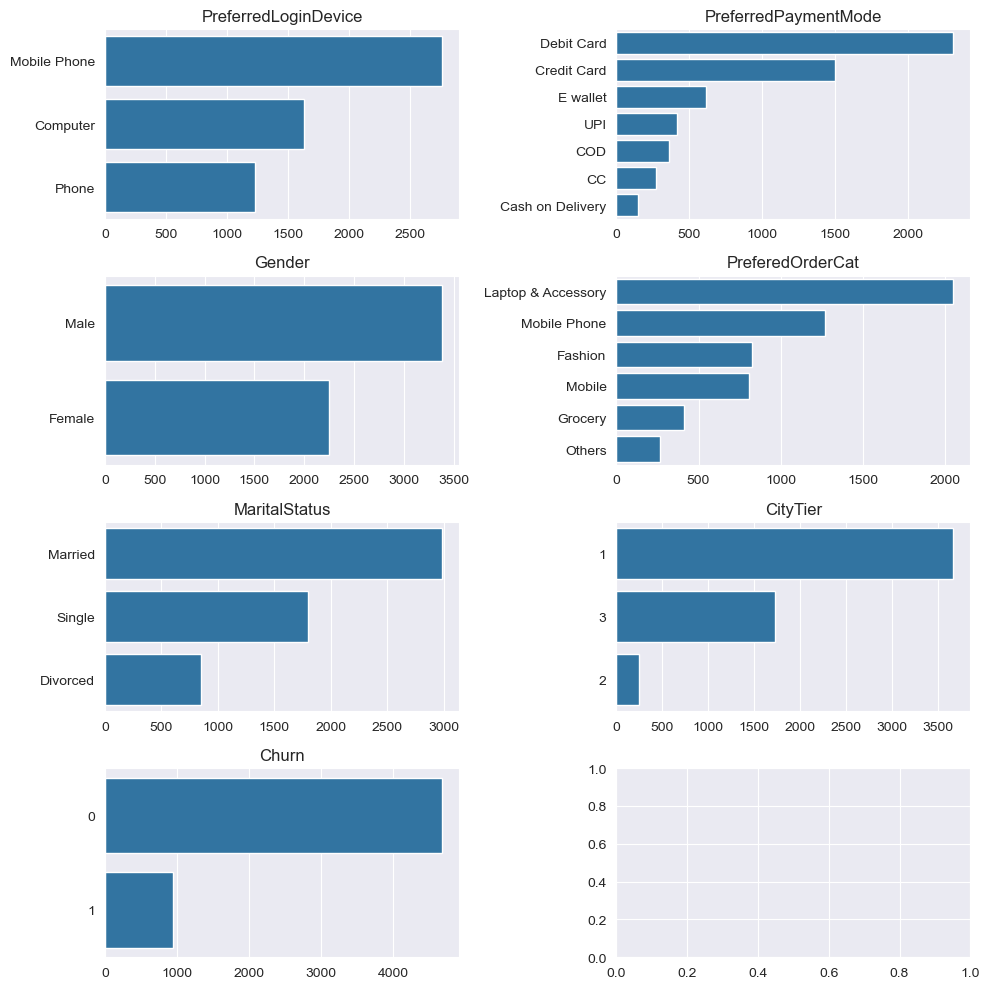

In [83]:
f, axs = plt.subplots(4, 2, figsize=(10, 10))
for ax, col in zip(axs.flatten(), cate_cols):
    sns.countplot(data=data, y=col, order = data[col].value_counts().index, ax=ax)
    ax.set(ylabel='', xlabel='', title=col)
    # ax.tick_params(axis='x', labelrotation=45)
f.tight_layout()

There are some inconsistent values in categorical column:
* PreferredLoginDevice: Phone -> Mobile Phone
* PreferredPaymentMode: CC -> Credit Card; COD -> Cash on Delivery
* PreferedOrderCat: Mobile -> Mobile Phone

### 1.2.4 Handle Inconsistent data

In [84]:
# PreferredLoginDevice column
data['PreferredLoginDevice'].replace('Phone', 'Mobile Phone', inplace=True)
print(data['PreferredLoginDevice'].unique())

# PreferredPaymentMode column
data['PreferredPaymentMode'].replace({'CC': 'Credit Card', 'COD': 'Cash on Delivery'}, inplace=True)
print(data['PreferredPaymentMode'].unique())

# PreferedOrderCat column
data['PreferedOrderCat'].replace('Mobile', 'Mobile Phone', inplace=True)
print(data['PreferedOrderCat'].unique())

['Mobile Phone' 'Computer']
['E wallet' 'Cash on Delivery' 'Debit Card' 'UPI' 'Credit Card']
['Fashion' 'Laptop & Accessory' 'Mobile Phone' 'Grocery' 'Others']


## 1.3 Feature Transforming

In [85]:
list_columns = data.loc[:, data.dtypes == np.object_].columns.tolist()
df_encoded = pd.get_dummies(data, columns = list_columns, dtype=int)
df_encoded

,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,...,Gender_Female,Gender_Male,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,0,20.0,3,7.0,4.0,4,5,3,0,26.0,...,1,0,1,0,0,0,0,0,1,0
1,0,13.0,1,9.0,4.0,4,3,2,0,26.0,...,1,0,1,0,0,0,0,0,0,1
2,0,16.0,3,7.0,3.0,4,3,3,0,26.0,...,0,1,0,0,1,0,0,1,0,0
3,0,5.0,1,16.0,3.0,4,4,3,0,26.0,...,0,1,1,0,0,0,0,0,1,0
4,0,9.0,1,28.0,3.0,4,2,3,1,26.0,...,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,0,61.0,3,28.0,4.0,4,1,6,1,15.0,...,1,0,0,1,0,0,0,0,1,0
5626,0,23.0,1,9.0,3.0,4,1,5,0,15.0,...,0,1,0,0,0,0,1,0,1,0
5627,0,29.0,2,33.0,4.0,2,4,6,1,15.0,...,0,1,0,0,0,0,1,0,1,0
5628,0,13.0,1,16.0,3.0,4,1,4,0,15.0,...,0,1,0,0,0,0,1,0,0,1


## 1.4 Apply base Random Forest model

### 1.4.1 Split train/test set

In [86]:
X =df_encoded.drop('Churn', axis = 1) #list of features
y =df_encoded[['Churn']] #target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)

#cross validation
skfcv=StratifiedKFold(n_splits=5)

### 1.4.2 Normalization for each set

In [87]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 1.4.3 Apply Model

In [88]:
clf_rand = RandomForestClassifier(max_depth=2, random_state=0)

clf_rand.fit(X_train_scaled, y_train)
y_ranf_pre_train = clf_rand.predict(X_train_scaled)
y_ranf_pre_test = clf_rand.predict(X_test_scaled)


## 1.5 Feature Importances

### 1.5.1 Define Importance features

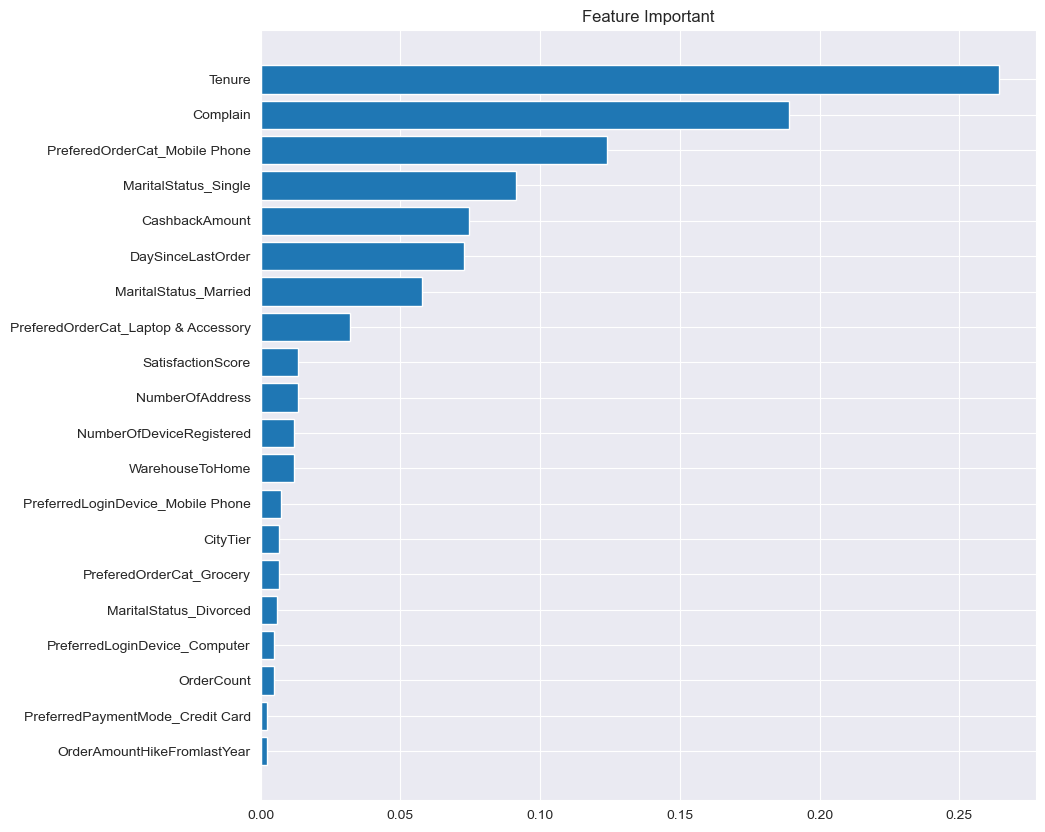

In [89]:
features = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X_test.columns, clf_rand.feature_importances_):
    features[feature] = importance #add the name/value pair

importances = pd.DataFrame.from_dict(features, orient='index').rename(columns={0: 'Gini-importance'})
importances = importances.sort_values(by='Gini-importance', ascending=True)

importances = importances.reset_index()

# Create bar chart
plt.figure(figsize=(10, 10))
plt.barh(importances.tail(20)['index'][:20], importances.tail(20)['Gini-importance'])

plt.title('Feature Important')

# Show plot
plt.show()

From the models feature importance the top three features with impact on customer's churn probability are: 
* Tenure of the customer.
* Complain
* The order category (mobile phone) of the customers

### 1.5.2 Analysis

In [90]:
# Calculate percentage churned for each group of selected column
def count_perc(df, column, target, count):
    
    churned = df[df[target]==1].groupby(column)[[count]].count().reset_index().sort_values(ascending=False, by = count)
    not_churn = df[df[target]==0].groupby(column)[[count]].count().reset_index().sort_values(ascending=False, by = count)

    # Merge 2 dataframe into one:
    temp_df = churned.merge(not_churn, on = column , how = 'outer')
    temp_df = temp_df.fillna(0)
    temp_df.rename(columns = {count+'_x':'churned',count+'_y':'not_churn'}, inplace = True)

    #Caculate the percentage:
    temp_df['%'] = temp_df['churned']*100/(temp_df['churned'] + temp_df['not_churn'])

    return temp_df

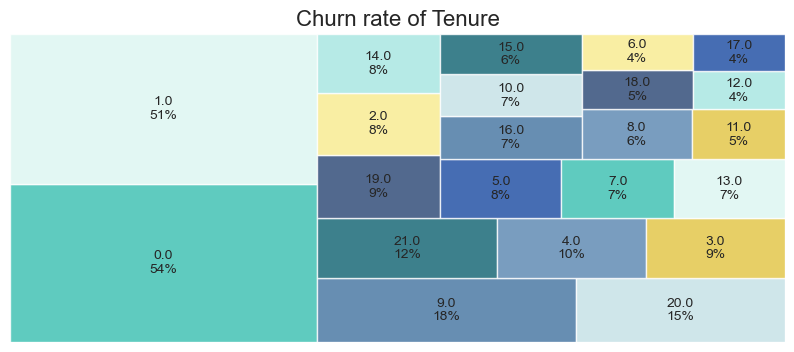

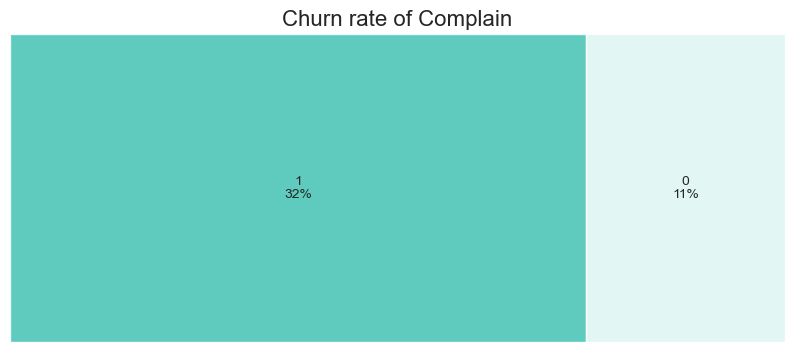

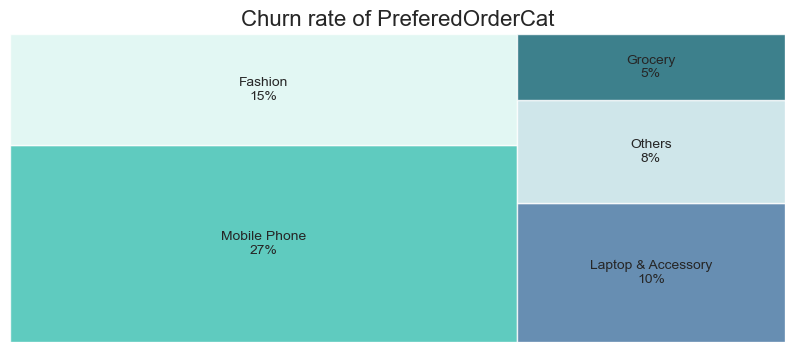

In [91]:
# Display with Treemap
colors = ['#37BEB0', '#DBF5F0', '#41729F', '#C3E0E5', '#0C6170', '#5885AF', '#E1C340', '#274472', '#F8EA8C', '#A4E5E0', '#1848A0']

for col in ['Tenure', 'Complain', 'PreferedOrderCat']:
    fig, ax = plt.subplots(figsize=(10,4))
    cnt_perc = count_perc(data, col, 'Churn', 'Churn').sort_values(by='%', ascending=False)

    data_perc = cnt_perc[cnt_perc['%'] != 0]

    labels = data_perc[col].astype('str') + '\n' + data_perc['%'].apply(lambda x:f'{x:.0f}%')

    squarify.plot(sizes=data_perc['%'], alpha=.8, label = labels, color=colors)
    ax.set_title('Churn rate of %s' % col, fontsize=16)
    plt.axis('off')
    plt.show()

* Tenure: Customer has low tenure tend to be churned more than others tenure (especially tenure 0 - 54% and 1 - 51%).
* Complain: Whether the customer has a complain on the service or not, as expected those with complains have higher churn rate (32%) than those without complain (11%).
* The order category of the customers, where those on the mobile category have higher churn rate (27%) than the second-highest Fashion (15%) and other categories.

### 1.5.3 Suggestions 

Focus on features having high churn rate:
* Lower tenure customers: Create brand awareness, offer credit, give them discount
* Complain: solving complain, take feedback, enhance customer service/ product quality,...
* Mobile phone Category Order: find out whether there are any issues with the vendor, goods, or services in that particular segment (Take feedback and surveys), then solve it.

# 2. Question 2
Build the Machine Learning model for predicting churned users (fine tuning).

## 2.1 Apply model

### 2.1.1 Logistic Regression

In [92]:
#Build logistic regression pipeline
log_pipe = Pipeline([('scaler',StandardScaler()), ('logreg',LogisticRegression())])

#cross validate logistic regression model
print(f"Cross validation score for Logistic Regression: {np.mean(cross_val_score(log_pipe, X_train, y_train, cv=skfcv, scoring='f1'))}")

Cross validation score for Logistic Regression: 0.6399666158069981


              precision    recall  f1-score   support

           0       0.96      0.91      0.93      1493
           1       0.51      0.74      0.60       196

    accuracy                           0.89      1689
   macro avg       0.74      0.82      0.77      1689
weighted avg       0.91      0.89      0.90      1689

Test score for Logistic Regression: 0.6041666666666666
Training score for Logistic Regression: 0.6602787456445993


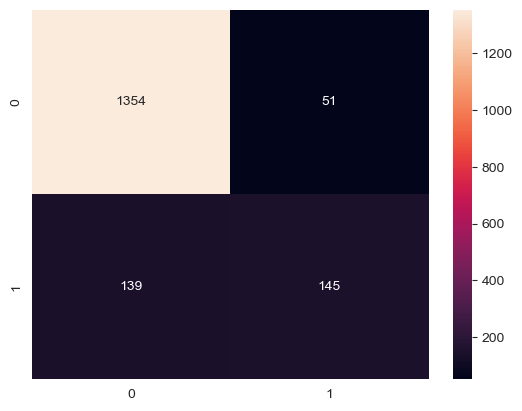

In [93]:
#use logistic regression pipeline to predict test sample
log_pipe.fit(X_train,y_train)
print(classification_report(log_pipe.predict(X_test), y_test))
print(f"Test score for Logistic Regression: {f1_score(y_test, log_pipe.predict(X_test))}")
print(f"Training score for Logistic Regression: {f1_score(y_train, log_pipe.predict(X_train))}")
log_mat = confusion_matrix(y_test, log_pipe.predict(X_test))
sns.heatmap(log_mat, annot=True,fmt="g")
plt.show()

### 2.1.2 Random Forest

In [94]:
#Build Random Forest pipeline
rf_pipe = Pipeline([('scaler',StandardScaler()), ('rfmodel',RandomForestClassifier())])

#cross validate Random Forest model
print(f"Cross validation score for Random Forest: {np.mean(cross_val_score(rf_pipe, X_train, y_train, cv=skfcv, scoring='f1'))}")

Cross validation score for Random Forest: 0.8238288467818684


              precision    recall  f1-score   support

           0       0.99      0.96      0.97      1447
           1       0.80      0.93      0.86       242

    accuracy                           0.96      1689
   macro avg       0.89      0.95      0.92      1689
weighted avg       0.96      0.96      0.96      1689

Test score for Random Forest: 0.8593155893536122
Training score for Random Forest: 1.0


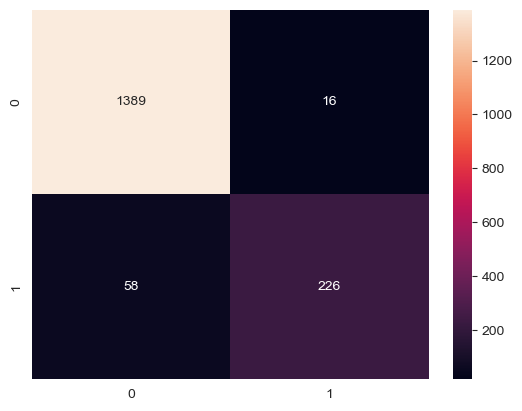

In [95]:
#use Random Forest pipeline to predict test and train sample
rf_pipe.fit(X_train, y_train)
print(classification_report(rf_pipe.predict(X_test), y_test))
print(f"Test score for Random Forest: {f1_score(y_test, rf_pipe.predict(X_test))}")
print(f"Training score for Random Forest: {f1_score(y_train, rf_pipe.predict(X_train))}")
rf_mat = confusion_matrix(y_test, rf_pipe.predict(X_test))
sns.heatmap(rf_mat, annot=True,fmt="g")
plt.show()

### 2.1.3 Decision Trees

In [96]:
#Build Decision Tree Classifier pipeline
dt_pipe = Pipeline([('scaler',StandardScaler()), ('dtmodel',DecisionTreeClassifier())])

#cross validate Random Forest model
print(f"Cross validation score for Decision Tree Classifier: {np.mean(cross_val_score(dt_pipe, X_train, y_train, cv=skfcv, scoring='f1'))}")

Cross validation score for Decision Tree Classifier: 0.7847404159194799


              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1396
           1       0.87      0.84      0.86       293

    accuracy                           0.95      1689
   macro avg       0.92      0.91      0.91      1689
weighted avg       0.95      0.95      0.95      1689

Test score for Decision Tree: 0.8561525129982669
Training score for Decision Tree: 1.0


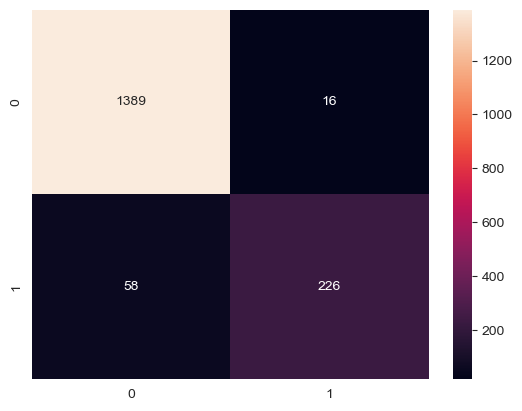

In [97]:
# use Random Forest pipeline to predict test and train sample
dt_pipe.fit(X_train,y_train)
print(classification_report(dt_pipe.predict(X_test), y_test))
print(f"Test score for Decision Tree: {f1_score(y_test, dt_pipe.predict(X_test))}")
print(f"Training score for Decision Tree: {f1_score(y_train, dt_pipe.predict(X_train))}")
dt_mat = confusion_matrix(y_test, rf_pipe.predict(X_test))
sns.heatmap(dt_mat, annot=True,fmt="g")
plt.show()

## 2.2 Hyperparameter Tuning

The Random Forest models performed better than other models, but the Random Forest models overtitted as their training f1-score is higher than their testing f1-score.
Tune the hyperparameters to reduce overfitting and improve test performance.

In [98]:
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Use GridSearchCV to find the best parameters
grid_search = RandomizedSearchCV(RandomForestClassifier(), param_grid, cv=skfcv, scoring='balanced_accuracy')

# Fit the model
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters
print("Best Parameters: ", grid_search.best_params_)

# Evaluate the best model on the test set
best_clf = grid_search.best_estimator_
accuracy = best_clf.score(X_test_scaled, y_test)
print("Test set accuracy: ", accuracy)

Best Parameters:  {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 30, 'bootstrap': False}
Test set accuracy:  0.9591474245115453


In [99]:
model_grid = RandomForestClassifier(n_estimators=10,
                                    min_samples_split=5,
                                    min_samples_leaf=1,
                                    max_depth=20,
                                    bootstrap=False)
model_grid.fit(X_train_scaled, y_train) 
y_pred_grid = model_grid.predict(X_test_scaled) 
print(classification_report(y_pred_grid, y_test)) 

              precision    recall  f1-score   support

           0       0.99      0.96      0.97      1445
           1       0.80      0.93      0.86       244

    accuracy                           0.96      1689
   macro avg       0.89      0.94      0.91      1689
weighted avg       0.96      0.96      0.96      1689



# 3. Question 3
Based on the behaviors of churned users, the company would like to offer some special promotions for them. Please segment these churned users into groups. What are the differences between groups? 

In [100]:
churn_data = data[data['Churn'] == 1]
churn_data.head()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
7,1,1.0,Computer,1,17.0,Credit Card,Female,4.0,5,Mobile Phone,4,Single,3,1,26.0,2.0,2.0,1.0,143.59
24,1,1.0,Computer,1,17.0,Credit Card,Female,4.0,5,Mobile Phone,4,Single,3,1,26.0,1.0,2.0,1.0,143.59
40,1,9.0,Computer,1,16.0,Credit Card,Female,3.0,4,Mobile Phone,4,Single,2,1,25.0,1.0,1.0,0.0,118.59
58,1,9.0,Computer,1,16.0,Credit Card,Female,3.0,4,Mobile Phone,4,Single,2,1,25.0,0.0,1.0,0.0,118.59
68,1,1.0,Computer,1,14.0,Debit Card,Male,4.0,6,Laptop & Accessory,3,Single,3,1,25.0,2.0,2.0,7.0,185.74


## 3.1 Encoding

In [101]:
dummies_df = pd.get_dummies(churn_data, columns = ['PreferredLoginDevice','PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus'], drop_first=True, dtype=int)
dummies_df.drop('Churn', axis=1, inplace=True)
dummies_df.head()

,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,...,PreferredPaymentMode_Debit Card,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single
7,1.0,1,17.0,4.0,5,4,3,1,26.0,2.0,...,0,0,0,0,0,0,1,0,0,1
24,1.0,1,17.0,4.0,5,4,3,1,26.0,1.0,...,0,0,0,0,0,0,1,0,0,1
40,9.0,1,16.0,3.0,4,4,2,1,25.0,1.0,...,0,0,0,0,0,0,1,0,0,1
58,9.0,1,16.0,3.0,4,4,2,1,25.0,0.0,...,0,0,0,0,0,0,1,0,0,1
68,1.0,1,14.0,4.0,6,3,3,1,25.0,2.0,...,1,0,0,1,0,1,0,0,0,1


## 3.2 Data Normalization

In [102]:
sc = StandardScaler()
sc.fit(dummies_df)
scaled_arr = sc.fit_transform(dummies_df)
scaled_churn_data = pd.DataFrame(scaled_arr, columns = dummies_df.columns)
scaled_churn_data.head()

,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,...,PreferredPaymentMode_Debit Card,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single
0,-0.522436,-0.862474,0.017320,1.540245,1.051114,0.454555,-0.525800,0.930667,2.744663,0.152555,...,-0.775468,-0.416254,-0.286691,-1.313064,-0.146805,-0.533435,0.814345,-0.146805,-0.754676,0.987421
1,-0.522436,-0.862474,0.017320,1.540245,1.051114,0.454555,-0.525800,0.930667,2.744663,-0.375264,...,-0.775468,-0.416254,-0.286691,-1.313064,-0.146805,-0.533435,0.814345,-0.146805,-0.754676,0.987421
2,0.939074,-0.862474,-0.103408,0.053328,0.064524,0.454555,-0.884403,0.930667,2.480292,-0.375264,...,-0.775468,-0.416254,-0.286691,-1.313064,-0.146805,-0.533435,0.814345,-0.146805,-0.754676,0.987421
3,0.939074,-0.862474,-0.103408,0.053328,0.064524,0.454555,-0.884403,0.930667,2.480292,-0.903084,...,-0.775468,-0.416254,-0.286691,-1.313064,-0.146805,-0.533435,0.814345,-0.146805,-0.754676,0.987421
4,-0.522436,-0.862474,-0.344862,1.540245,2.037705,-0.290978,-0.525800,0.930667,2.480292,0.152555,...,1.289543,-0.416254,-0.286691,0.761577,-0.146805,1.874643,-1.227981,-0.146805,-0.754676,0.987421


## 3.3 PCA

In [115]:
pca=PCA(n_components=3)
pca.fit(scaled_churn_data)
PCA_df=pd.DataFrame(pca.transform(scaled_churn_data), columns=['PC1', 'PC2', 'PC3'])
PCA_df.head()

,PC1,PC2,PC3
0,-1.583434,-0.499688,1.248727
1,-1.754360,-0.360562,1.179606
2,-2.197251,-0.278608,1.030422
3,-2.368177,-0.139482,0.961301
4,0.893193,0.513076,1.844132


In [117]:
pca.explained_variance_ratio_

array([0.1356438 , 0.08648837, 0.08005306])

## 3.2 Apply model

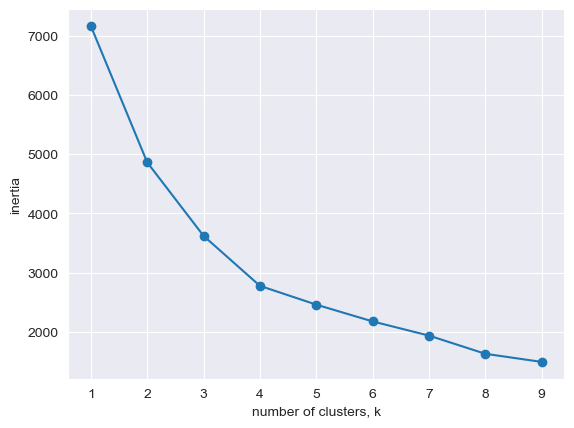

In [118]:
x = PCA_df
ks = range(1, 10)
inerias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(x)
    inerias.append(model.inertia_)

# Plot inertia
plt.plot(ks, inerias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

No clear elbow points, therefore no clearly common patterns between data, and we can not cluster them into groups \
&rarr; Collect more data of churned users then predict and use it as ground truth data for clustering model
